<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
data = yf.download('^nsei',start='2019-01-01',end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [12]:
data['ema']=data['Adj Close'].ewm(span=10).mean()

In [13]:
data=data.dropna()

In [14]:
predict_data= yf.download('^nsei',start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [15]:
predict_data['ema']=predict_data['Adj Close'].ewm(span=10).mean()
predict_data=predict_data.dropna()

In [23]:
#Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(data[['ema']],data[['Adj Close']], test_size=.2)

In [24]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[1.0315806]]
Mean Absolute Error: 124.83663926526535
Coefficient of Determination: 0.9569176521240663


In [26]:
prediction=model.predict(predict_data[['ema']])

In [28]:
prediction.shape

(272, 1)

In [29]:
predict_data.shape

(272, 7)

In [33]:
cols=['prediction','Adj Close']

In [37]:
final=pd.DataFrame(np.c_[prediction,predict_data['Adj Close'].values])

In [38]:
final.columns=cols

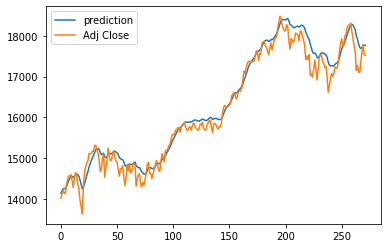

In [39]:
final.plot()